In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt 

tweets = pd.read_csv('combined.csv', encoding='latin')
tweets.head(5)

,tweet_date_created,tweet_id,tweet_text,language,sentiment,sentiment_score
0,2018-05-08T08:19:09,993767246437666816,Bayer Leverkusen goalkeeper Bernd Leno will no...,en,NEUTRAL,"{""Neutral"":0.7228581905364990234375,""Negative""..."
1,2018-07-02T19:28:00.331000,1013866900772835331,Gary Speed v Blackburn at St James in 2001/02 ...,en,NEUTRAL,"{""Neutral"":0.998256266117095947265625,""Negativ..."
2,2018-09-05T12:54:20.408000,1037323043360657408,@ChelseaFC Don't make him regret it and start ...,en,NEUTRAL,"{""Neutral"":0.912796199321746826171875,""Negativ..."
3,2018-05-08T10:42:17,993803266323550208,"@LiverpoolFF @AnfieldEdition He's a liar, made...",en,NEGATIVE,"{""Neutral"":0.3271420896053314208984375,""Negati..."
4,2018-08-07T07:29:59.136000,1026732168226267136,@theesk @Everton Didn't realise Kenwright is d...,en,NEUTRAL,"{""Neutral"":0.957906246185302734375,""Negative"":..."


In [2]:
tweets.drop(['tweet_date_created', 'language', 'sentiment_score'], axis=1, inplace=True)

In [3]:
duplicates = tweets[tweets.duplicated(subset=['tweet_id'], keep=False)]

if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate tweet ids. Removing duplicates...")
    tweets.drop_duplicates(subset=['tweet_id'], inplace=True)
else:
    print("No duplicate tweet ids found.")

Found 762643 duplicate tweet ids. Removing duplicates...


In [5]:
tweets.drop(['tweet_id'], axis=1, inplace=True)

In [7]:
tweets.to_csv('update_combined_dataset.csv', index=False)

In [8]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('update_combined_dataset.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")


The size of the file is 734.2 MB


In [13]:
import pandas as pd
import re

# Load the dataset
tweets = pd.read_csv('update_combined_dataset.csv')

# Convert the 'tweet_text' column to strings
tweets['tweet_text'] = tweets['tweet_text'].astype(str)

# Define a function to remove URLs from a string
def remove_urls(text):
    return re.sub(r"http\S+|www\S+", "", text)

# Apply the function to a column in the dataset
tweets['text_without_url'] = tweets['tweet_text'].apply(remove_urls)

tweets.drop(['tweet_text'], axis=1, inplace=True)

tweets.to_csv('no_urls.csv', index=False)

# Print the updated dataset
tweets.head(5)


,sentiment,text_without_url
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,@ChelseaFC Don't make him regret it and start ...
3,NEGATIVE,"@LiverpoolFF @AnfieldEdition He's a liar, made..."
4,NEUTRAL,@theesk @Everton Didn't realise Kenwright is d...


In [14]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('no_urls.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")

The size of the file is 699.5 MB


In [15]:
import pandas as pd
import re

# Load the dataset
tweets = pd.read_csv('no_urls.csv')
tweets.head(5)

,sentiment,text_without_url
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,@ChelseaFC Don't make him regret it and start ...
3,NEGATIVE,"@LiverpoolFF @AnfieldEdition He's a liar, made..."
4,NEUTRAL,@theesk @Everton Didn't realise Kenwright is d...


In [16]:
import pandas as pd
import re

# Load the dataset
tweets = pd.read_csv('no_urls.csv')

# Convert the 'tweet_text' column to strings
tweets['text_without_url'] = tweets['text_without_url'].astype(str)

# Define a function to remove URLs from a string
def remove_urls(text):
    return re.sub(r'@\w+', '', text)

# Apply the function to a column in the dataset
tweets['text_without_mentions'] = tweets['text_without_url'].apply(remove_urls)

tweets.drop(['text_without_url'], axis=1, inplace=True)

tweets.to_csv('no_mentions.csv', index=False)

# Print the updated dataset
tweets.head(5)


,sentiment,text_without_mentions
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,Don't make him regret it and start him over H...
3,NEGATIVE,"He's a liar, made up. I've unfollowed him as..."
4,NEUTRAL,Didn't realise Kenwright is due to leave at ...


In [17]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('no_mentions.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")

The size of the file is 585.6 MB


In [19]:
tweets = pd.read_csv('no_mentions.csv')
tweets.head(5)

,sentiment,text_without_mentions
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,Don't make him regret it and start him over H...
3,NEGATIVE,"He's a liar, made up. I've unfollowed him as..."
4,NEUTRAL,Didn't realise Kenwright is due to leave at ...


In [20]:
import pandas as pd
import re

# Load the dataset
tweets = pd.read_csv('no_mentions.csv')

# Convert the 'tweet_text' column to strings
tweets['text_without_mentions'] = tweets['text_without_mentions'].astype(str)

# Define a function to remove URLs from a string
def remove_urls(text):
    return re.sub(r'#\w+', '', text)

# Apply the function to a column in the dataset
tweets['text_without_hashtags'] = tweets['text_without_mentions'].apply(remove_urls)

tweets.drop(['text_without_mentions'], axis=1, inplace=True)

tweets.to_csv('no_hashtags.csv', index=False)

# Print the updated dataset
tweets.head(5)


,sentiment,text_without_hashtags
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,Don't make him regret it and start him over H...
3,NEGATIVE,"He's a liar, made up. I've unfollowed him as..."
4,NEUTRAL,Didn't realise Kenwright is due to leave at ...


In [21]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('no_hashtags.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")

The size of the file is 544.0 MB


In [10]:
import pandas as pd
import re
import string

# Load the dataset
tweets = pd.read_csv('no_hashtags.csv')

# Convert the 'text_without_hashtags' column to strings
tweets['text_without_hashtags'] = tweets['text_without_hashtags'].astype(str)

# Define a function to remove URLs and punctuation from a string
def remove_urls_and_punctuation(text):
    # Remove URLs
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    translator = str.maketrans("", "", string.punctuation)
    text = text.translate(translator)
    return text

# Apply the function to a column in the dataset
tweets['text_without_punctuation'] = tweets['text_without_hashtags'].apply(remove_urls_and_punctuation)

# Drop the original 'text_without_hashtags' column
tweets.drop(['text_without_hashtags'], axis=1, inplace=True)

# Save the updated dataset to a CSV file
tweets.to_csv('no_punctuation2.csv', index=False)

# Print the updated dataset
print(tweets.head(5))


  sentiment                           text_without_punctuation
0   NEUTRAL  Bayer Leverkusen goalkeeper Bernd Leno will no...
1   NEUTRAL  Gary Speed v Blackburn at St James in 200102 a...
2   NEUTRAL   Dont make him regret it and start him over Ho...
3  NEGATIVE    Hes a liar made up Ive unfollowed him as loa...
4   NEUTRAL    Didnt realise Kenwright is due to leave at t...


In [11]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('no_punctuation2.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")

The size of the file is 523.3 MB


In [2]:
import pandas as pd

df = pd.read_csv('no_punctuation2.csv')
df.head(5)

,sentiment,text_without_punctuation
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 200102 a...
2,NEUTRAL,Dont make him regret it and start him over Ho...
3,NEGATIVE,Hes a liar made up Ive unfollowed him as loa...
4,NEUTRAL,Didnt realise Kenwright is due to leave at t...


In [4]:
import pandas as pd
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

df['text_without_punctuation'] = df['text_without_punctuation'].astype(str)

df['tokens'] = df['text_without_punctuation'].apply(lambda x: nltk.word_tokenize(x) if isinstance(x, str) else [])
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

df.head(20)

# all_words = [word for tokens in df['filtered_tokens'] for word in tokens]
# word_freq = Counter(all_words)
# word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])
# word_freq_df = word_freq_df.sort_values(by=['Frequency'], ascending=False)
# print(word_freq_df.head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\clayt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clayt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,text_without_punctuation,tokens,filtered_tokens
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...,"[Bayer, Leverkusen, goalkeeper, Bernd, Leno, w...","[Bayer, Leverkusen, goalkeeper, Bernd, Leno, g..."
1,NEUTRAL,Gary Speed v Blackburn at St James in 200102 a...,"[Gary, Speed, v, Blackburn, at, St, James, in,...","[Gary, Speed, v, Blackburn, St, James, 200102,..."
2,NEUTRAL,Dont make him regret it and start him over Ho...,"[Dont, make, him, regret, it, and, start, him,...","[Dont, make, regret, start, Hoofiz]"
3,NEGATIVE,Hes a liar made up Ive unfollowed him as loa...,"[Hes, a, liar, made, up, Ive, unfollowed, him,...","[Hes, liar, made, Ive, unfollowed, loads, othe..."
4,NEUTRAL,Didnt realise Kenwright is due to leave at t...,"[Didnt, realise, Kenwright, is, due, to, leave...","[Didnt, realise, Kenwright, due, leave, end, m..."
5,NEUTRAL,My knowledge has decreased somewhat in the p...,"[My, knowledge, has, decreased, somewhat, in, ...","[knowledge, decreased, somewhat, past, seasons]"
6,NEUTRAL,Report Linked with and Italians set to sign ...,"[Report, Linked, with, and, Italians, set, to,...","[Report, Linked, Italians, set, sign, Â£45mrat..."
7,NEUTRAL,Am seeing tweets that thereÂs been a fall out...,"[Am, seeing, tweets, that, thereÂs, been, a, ...","[seeing, tweets, thereÂs, fall, money, men, I..."
8,NEUTRAL,Expect loads of excuses after tonightÂs game,"[Expect, loads, of, excuses, after, tonightÂs...","[Expect, loads, excuses, tonightÂs, game]"
9,NEUTRAL,IÂm just fine I have your fanbase ...,"[IÂm, just, fine, I, have, your, fanbase, ang...","[IÂm, fine, fanbase, angry, stating, facts, a..."


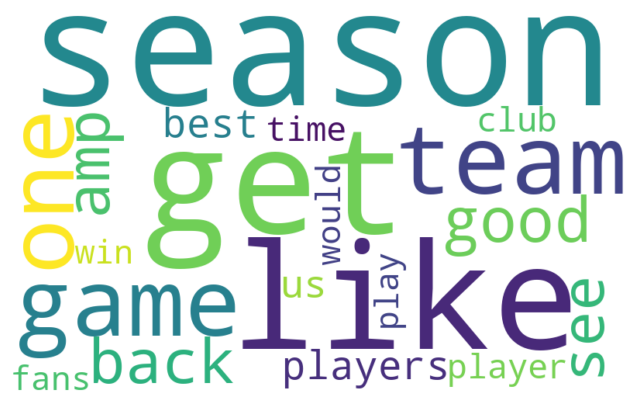

In [12]:
from wordcloud import WordCloud

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=20, contour_width=3, contour_color='steelblue')
wordcloud.generate_from_frequencies(word_freq)

# Display the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

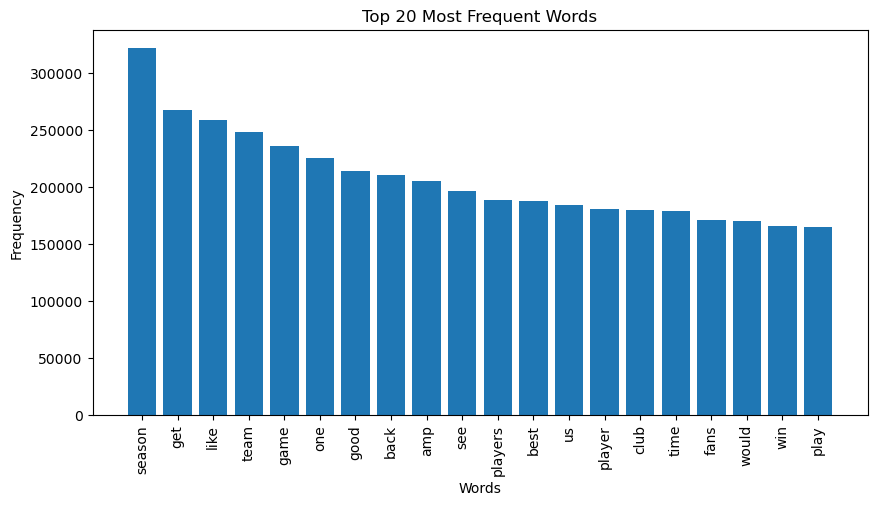

In [16]:
import matplotlib.pyplot as plt

# Select top 20 most frequent words
top_words = word_freq_df.head(20)

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_words.index, top_words['Frequency'])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()


In [ ]:
positive_tweets = tweets[tweets['sentiment'] == 'POSITIVE']
negative_tweets = tweets[tweets['sentiment'] == 'NEGATIVE']
neutral_tweets = tweets[tweets['sentiment'] == 'NEUTRAL']
mixed_tweets = tweets[tweets['sentiment'] == 'MIXED']

print('No of positive tagged tweets is: {}'.format(len(positive_tweets)))
print('No of negative tagged tweets is: {}'.format(len(negative_tweets)))
print('No of neutral tagged tweets is: {}'.format(len(neutral_tweets)))
print('No of mixed tagged tweets is: {}'.format(len(mixed_tweets)))